# Telecom Churn Case Study

1. Data Reading and Understanding.
2. Data Cleaning and EDA
3. Data Preprocessing.
4. Modeling.
5. Recommendations.

## 1.Data Reading and Understanding

In [86]:
#importing libraries
import numpy as np , pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',200)

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier

In [87]:
df = pd.read_csv('telecom_churn_data.csv')
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [88]:
len(df.mobile_number.unique())

99999

In [89]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [90]:
df.shape

(99999, 226)

In [91]:
df.describe(include='object')

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
count                 99999                99398                98899   
unique                    1                    1                    1   
top               6/30/2014            7/31/2014            8/31/2014   
freq                  99999                99398                98899   

       last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
count                 98340               98392               98232   
unique                    1                  30                  31   
top               9/30/2014           6/30/2014           7/31/2014   
freq                  98340               16960               17288   

       date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
count                96377               95239                    25153   
unique                  31                  30                       30   
top              8/31/2014           9/29/2014                6/30/2014   
freq                 14706               22623                     1888   

       date_of_last_rech_data_7 date_of_last_rech_data_8  \
count                     25571                    26339   
unique                       31                       31   
top                   7/31/2014                8/31/2014   
freq                       1813                     1998   

       date_of_last_rech_data_9  
count                     25922  
unique                       30  
top                   9/29/2014  
freq                       2329

## 2.Data Cleaning & Exploratory Data Analysis

# EDA

In [92]:
sns.set_theme(style='white')

In [93]:
def boxs(y):
    plt.figure(figsize=(12,5))
    plt.title('Box Plot of ' + y.name,fontdict={'size':20,'family': 'serif'})
    sns.boxplot(y=y)
def hist(y):
    plt.figure(figsize=(12,5))
    plt.title('Box Plot of ' + y.name,fontdict={'size':20,'family': 'serif'})
    sns.histplot(y)

### Missing Value Treatment

In [94]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False).head(100)

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
night_pck_user_9            74.077741
date_of_last_rech_data_9    74.077741
fb_user_9                   74.077741
arpu_2g_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
total_rech_d

- <b>Dropping columns with more than 70% missing value.

In [95]:
df.dropna(thresh=df.shape[0]*0.7,axis=1,inplace=True)

- <b> Filling rest of the categorical & numerical columns with mode & median respectively.

In [96]:
cat_col = df.select_dtypes(include='object').columns
df[cat_col].isna().sum()/len(df)

last_date_of_month_6    0.00000
last_date_of_month_7    0.00601
last_date_of_month_8    0.01100
last_date_of_month_9    0.01659
date_of_last_rech_6     0.01607
date_of_last_rech_7     0.01767
date_of_last_rech_8     0.03622
date_of_last_rech_9     0.04760
dtype: float64

In [97]:
# categorical columns
cat_col = df.select_dtypes(include='object').columns

df[cat_col] = df[cat_col].fillna(df[cat_col].mode().iloc[0])

In [98]:
df[cat_col].isna().sum()

last_date_of_month_6    0
last_date_of_month_7    0
last_date_of_month_8    0
last_date_of_month_9    0
date_of_last_rech_6     0
date_of_last_rech_7     0
date_of_last_rech_8     0
date_of_last_rech_9     0
dtype: int64

In [99]:
#numericals
df.fillna(df.fillna(df.median()),inplace=True)

In [100]:
df.isna().sum().sort_values(ascending=False).head()

sep_vbc_3g          0
std_og_t2f_mou_7    0
std_og_mou_8        0
std_og_mou_7        0
std_og_mou_6        0
dtype: int64

In [101]:
df.shape

(99999, 186)

### Filtering High Value Customers 

In [102]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] +df['total_rech_amt_7']) / 2
df.avg_rech_amt_6_7

0        307.0
1        229.0
2        241.5
3        270.0
4        273.0
         ...  
99994     85.0
99995    110.0
99996     59.5
99997    369.5
99998    355.0
Name: avg_rech_amt_6_7, Length: 99999, dtype: float64

In [103]:
bottom_70 = df.avg_rech_amt_6_7.quantile(.7)

- <b> Retaining only the top 30% of customers.

In [104]:
df = df[df['avg_rech_amt_6_7'] > bottom_70]
df.shape

(29979, 187)

In [105]:
to_drop = ['avg_rech_amt_6_7']

### Deriving Target Variable.

In [106]:
month_9 = df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]
month_9.head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
7             0.00            0.00          0.0          0.0
8            34.91          142.18          0.0          0.0
13          631.86          446.09          0.0          0.0
16          334.56          255.74          0.0          0.0
17           87.13          631.08          0.0          0.0

In [107]:
df['Churn'] = (~month_9.any(axis=1)).map(lambda x : 1 if (x==True) else 0)

In [108]:
df.Churn

7        1
8        0
13       0
16       0
17       0
        ..
99970    0
99974    0
99986    0
99988    0
99997    0
Name: Churn, Length: 29979, dtype: int64

In [109]:
df.Churn.mean()*100

8.636045231662164

In [110]:
df.shape

(29979, 188)

- <b>Dropping all the columns for september month.

In [111]:
to_drop.extend([x for x in df.columns if x[-2:]=='_9'])

In [112]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
13            9/30/2014   492.846   205.671   593.260  322.732       501.76   
16            9/30/2014   430.975   299.869   187.894  206.490        50.51   
17            9/30/2014   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7         54.68        52.29        29.84        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
13       108.39       534.24       244.81        413.31        119.28   
16        74.01        70.61        31.34        296.29        229.74   
17         9.28         7.79       558.51         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         325.91         87.29          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
13        482.46        214.06          23.53         144.24          72.11   
16        162.76        224.39           0.00           2.83           0.00   
17          5.54         87.89           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7            0.00          23.74          12.59          38.06           0.00   
8            0.00           0.00           0.00           0.00           0.00   
13         136.78           7.98          35.26           1.44          12.78   
16           0.00           0.00          17.74           0.00           0.00   
17           0.00           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28             11.26   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28             39.12   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23              0.00   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51    

- <b> Dropping Highly skewed columns.

In [113]:
num_col = df.select_dtypes(exclude='object').columns

def binning(x):
    if x == 'Churn' :
        pass
    elif x in ['fb_user_6',"fb_user_7","fb_user_8","fb_user_9"]:
        pass
    elif list(df[x].value_counts(normalize=True) > 0.75)[0] :
        to_drop.append(x)
        
for x in num_col:
    binning(x)

In [114]:
to_drop.extend(['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7','loc_og_t2f_mou_8', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8','loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
'std_ic_t2t_mou_6','std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6','std_ic_t2m_mou_7', 
'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6','std_ic_t2f_mou_7', 'std_ic_t2f_mou_8','ic_others_6', 
'ic_others_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8','vol_3g_mb_7', 'aug_vbc_3g', 
'jul_vbc_3g','mobile_number'])

In [115]:
df.drop(to_drop,axis=1,inplace=True)

### Deriving new columns

- <b>total_rech_amt_6_7_8

In [116]:
df['total_rech_amt_6_7_8'] = df.total_rech_amt_6 + df.total_rech_amt_7 + df.total_rech_amt_8

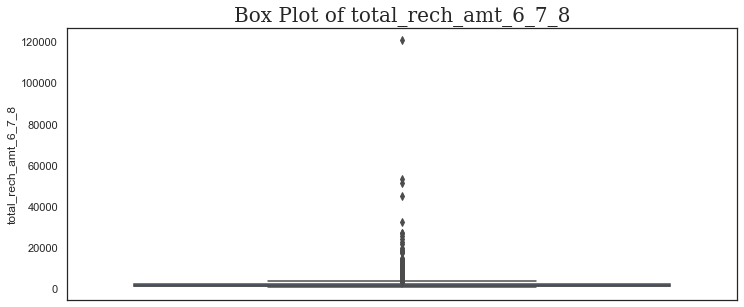

In [117]:
boxs(df.total_rech_amt_6_7_8)

In [118]:
df.shape

(29979, 63)

- <b>total_og_6_7_8

In [119]:
df["total_og_6_7_8"] = df.total_og_mou_6 + df.total_og_mou_7 + df.total_og_mou_8

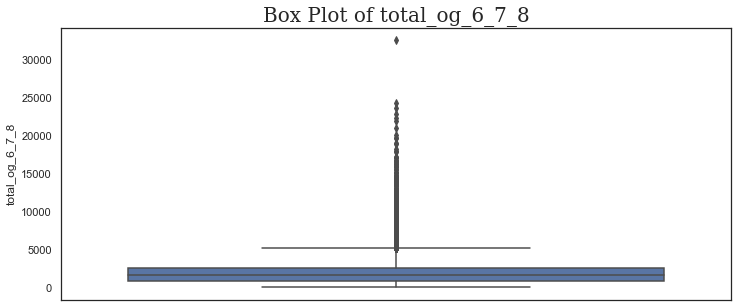

In [120]:
boxs(df.total_og_6_7_8)

- <b>total_ic_6_7_8

In [121]:
df["total_ic_6_7_8"] = df.total_ic_mou_6 + df.total_ic_mou_7 +df.total_ic_mou_8

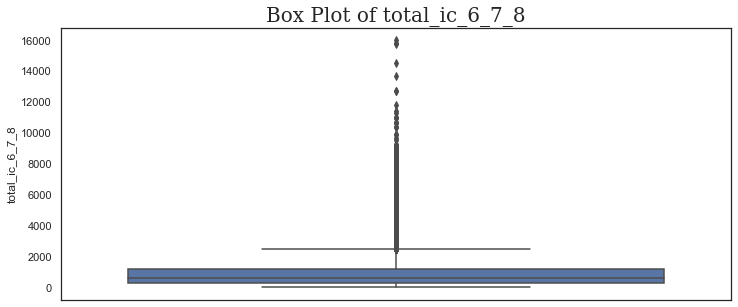

In [122]:
boxs(df.total_ic_6_7_8)

In [123]:
# Deriving new columns: No. of days before the end of month(EOM) was the last recharge
df_date = df[df.select_dtypes('object').columns].apply(lambda x: pd.to_datetime(x))

df['recharge_num_days_before_EOM_6'] = df_date['last_date_of_month_6'] - df_date['date_of_last_rech_6']
df['recharge_num_days_before_EOM_6'] = df['recharge_num_days_before_EOM_6'].dt.days

df['recharge_num_days_before_EOM_7'] = df_date['last_date_of_month_7'] - df_date['date_of_last_rech_7']
df['recharge_num_days_before_EOM_7'] = df['recharge_num_days_before_EOM_7'].dt.days

df['recharge_num_days_before_EOM_8'] = df_date['last_date_of_month_8'] - df_date['date_of_last_rech_8']
df['recharge_num_days_before_EOM_8'] = df['recharge_num_days_before_EOM_8'].dt.days

<AxesSubplot:xlabel='Churn', ylabel='recharge_num_days_before_EOM_6'>

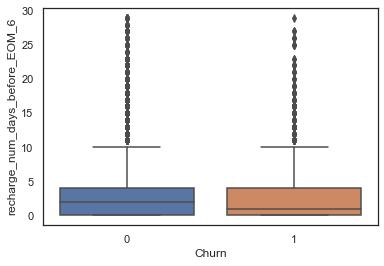

In [124]:
sns.boxplot(y=df.recharge_num_days_before_EOM_6,x=df.Churn)

<AxesSubplot:xlabel='Churn', ylabel='recharge_num_days_before_EOM_7'>

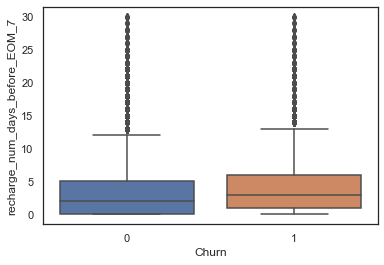

In [125]:
sns.boxplot(y=df.recharge_num_days_before_EOM_7,x=df.Churn)

<AxesSubplot:xlabel='Churn', ylabel='recharge_num_days_before_EOM_7'>

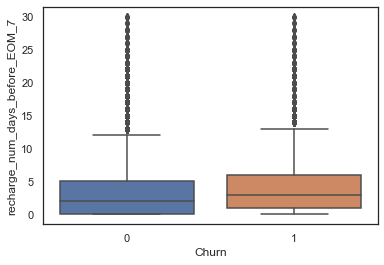

In [126]:
sns.boxplot(y=df.recharge_num_days_before_EOM_7,x=df.Churn)

- <b> Dropping negative values before transforming

In [127]:
df.drop(df[df['arpu_6'] < 0].index ,axis=0,inplace=True)

df.drop(df[df['arpu_7'] < 0].index ,axis=0,inplace=True)

df.drop(df[df['arpu_8'] < 0].index ,axis=0,inplace=True)

### Data Transformtion

In [128]:
num_col = df.select_dtypes(exclude='object').columns
transform_vars = list(num_col)
for x in ['aon','Churn','total_rech_num_6', 'total_rech_num_7','total_rech_num_8', 'recharge_num_days_before_EOM_6', 
          'recharge_num_days_before_EOM_7' , 'recharge_num_days_before_EOM_8']:
    transform_vars.remove(x)

In [129]:
df[transform_vars] = df[transform_vars].apply(lambda x : np.sqrt(x))

In [130]:
# For checking outliers in numerical columns
# num_col = df.select_dtypes(exclude='object').columns
# for x in df[num_col].columns:
#     boxs(df[x])

- <b> Fine tuning extreme outliers.

- total_rech_amt_6_7_8 

In [131]:
df['total_rech_amt_6_7_8'] = df.total_rech_amt_6 + df.total_rech_amt_7 + df.total_rech_amt_8

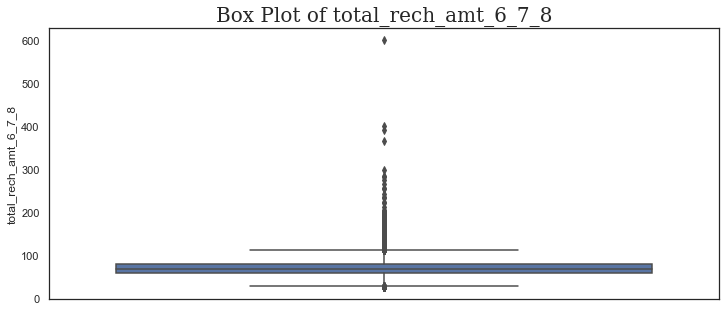

In [132]:
boxs(df.total_rech_amt_6_7_8)

In [133]:
Q = df.total_rech_amt_6_7_8.quantile(.99)
df.drop(df[df.total_rech_amt_6_7_8 > Q].index,inplace=True)

In [134]:
df.shape

(29531, 68)

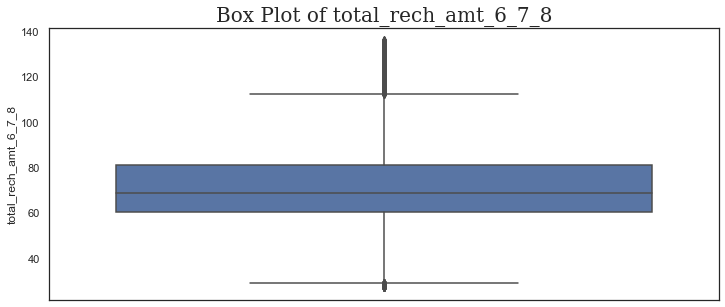

In [135]:
boxs(df.total_rech_amt_6_7_8)

-  total_rech_num_6

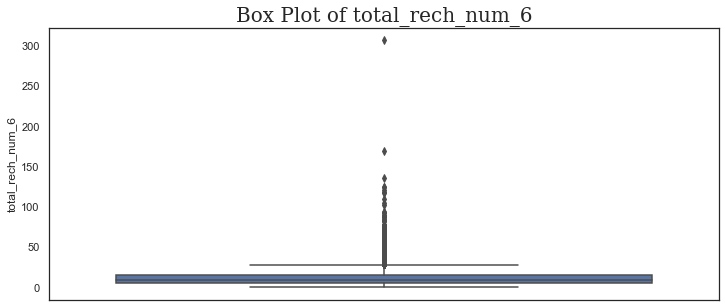

In [136]:
boxs(df.total_rech_num_6)

In [137]:
Q = df.total_rech_num_6.quantile(.99)
df.drop(df[df.total_rech_num_6 > Q].index,inplace=True)

In [138]:
df.shape

(29248, 68)

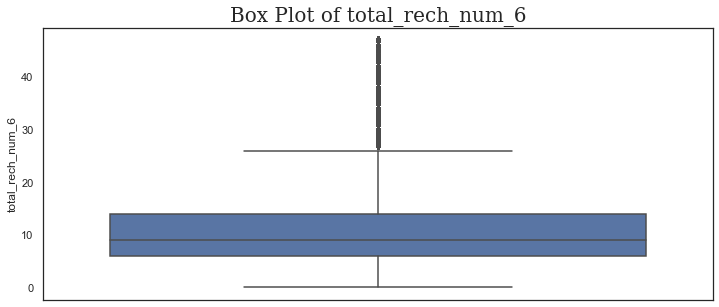

In [139]:
boxs(df.total_rech_num_6)

-  total_rech_num_8

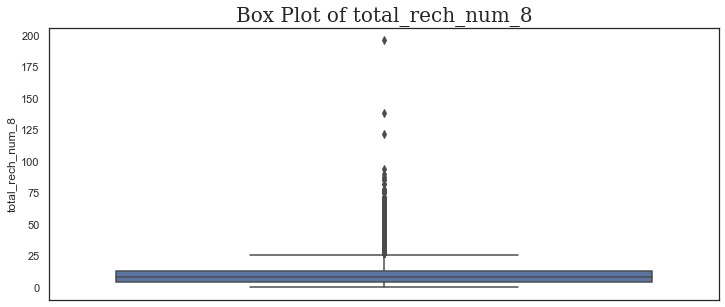

In [140]:
boxs(df.total_rech_num_8)

In [141]:
df.drop(df[df.total_rech_num_8 > 80].index,inplace=True)

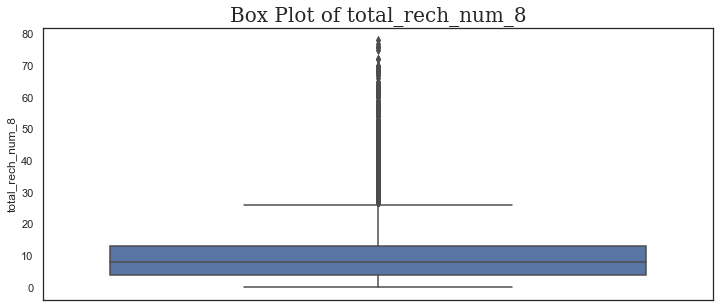

In [142]:
boxs(df.total_rech_num_8)

In [143]:
df.drop(df.select_dtypes('object').columns,inplace=True,axis = 1)

In [144]:
df.shape

(29238, 62)

In [145]:
df

arpu_6     arpu_7     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7      32.698318  36.740305  56.315895     7.605261     7.394593     7.231182   
8      19.460755  22.186099  11.720154    20.339371    18.735795     5.922837   
13     22.200135  14.341234  24.356929    22.400000    10.411052    23.113632   
16     20.759937  17.316726  13.707443     7.107039     8.602906     8.402976   
17     26.268003   4.356604   5.049653    34.437044     3.046309     2.791057   
...          ...        ...        ...          ...          ...          ...   
99970  16.163818  20.263613  17.054354     2.238303    11.941105     9.879777   
99974  20.354434  17.919068  19.261776     4.190465     0.000000     1.140175   
99986  25.396319  21.336073  23.755715    28.402993    23.438430    27.846185   
99988  17.679310  22.648002  20.051933    14.138246    13.208331     1.568439   
99997  17.971950  17.417979  24.633656     0.000000     0.000000     0.000000   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  loc_og_t2t_mou_6  \
7         21.293896     23.815121     18.052978          7.168682   
8          9.729337      8.979421     11.682465         17.237459   
13        20.330027     10.921538     21.964972          7.044856   
16        17.213076     15.157177     12.757743          6.527634   
17         7.851115      0.000000      2.353720          6.244197   
...             ...           ...           ...               ...   
99970     18.154338     22.363810     18.854177          2.238303   
99974     20.698068     19.151501     18.988944          3.179623   
99986     28.013568     24.842101     24.401639         26.630997   
99988     13.261976     16.643617     15.758490         13.049138   
99997      0.000000      0.000000      0.000000          0.000000   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7              5.601785          6.346653         17.567868         21.151359   
8             14.750932          3.534119          8.997778          8.401190   
13             2.487971          6.000833         12.293494          6.876045   
16             8.072174          8.208532         16.531485         12.082632   
17             0.000000          0.000000          7.651144          0.000000   
...                 ...               ...               ...               ...   
99970         11.476498          8.765272          2.798214          5.684189   
99974          0.000000          0.000000         20.076852         18.617465   
99986         22.274200         26.805969         23.977698         23.384610   
99988         12.102892          1.568439         11.740102         12.197541   
99997          0.000000          0.000000          0.000000          0.000000   

       loc_og_t2m_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
7             12.738917     20.546533     23.106493     15.993436   
8              7.109149     19.444537     16.975865      7.939773   
13            17.159837     14.328643      7.313002     18.814622   
16            11.326076     17.773857     14.684686     14.350261   
17             0.000000      9.876234      0.000000      0.000000   
...                 ...           ...           ...           ...   
99970          7.735632      3.606938     12.807420     11.742657   
99974         18.812496     20.393872     18.667887     18.839055   
99986         22.214410     36.061475     32.595705     35.000857   
99988         11.314150     17.553062     17.183131     11.422784   
99997          0.000000      0.000000      0.000000      0.000000   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
7              2.073644          4.825971          3.465545          7.063285   
8             10.796296         11.551190          4.751842          3.700000   
13            21.128417          9.272540         22.321066         15.979987   
16             2.808914          1.606238          1.797220          4.794789   
1

### Train Test Split

In [146]:
X = df.drop('Churn',1).copy()
y = df.Churn.copy()

In [147]:
print(X.shape,y.shape)

(29238, 61) (29238,)


In [148]:
df.Churn.value_counts(normalize=True)*100

0    91.630754
1     8.369246
Name: Churn, dtype: float64

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = df.Churn)

In [150]:
y_train.mean()

0.08369979478158898

In [151]:
y_test.mean()

0.08367533059735523

In [152]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(20466, 61) (20466,)
(8772, 61) (8772,)


### Data Imbalance

In [153]:
# Resampling the minority class. The strategy can be changed as required.
smote = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = smote.fit_sample(X_train, y_train)
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

<AxesSubplot:xlabel='Churn', ylabel='count'>

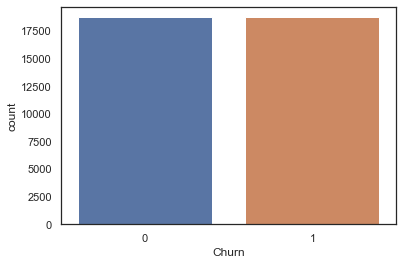

In [154]:
sns.countplot(oversampled_Y)

### Scaling the data

In [155]:
oversampled_X.head()

arpu_6     arpu_7     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  17.197384  27.032111  21.277312     6.938300    22.505333    17.186914   
1  23.884116  19.139488  21.623783    14.961283    15.016324    14.123739   
2  26.332224  27.602753   9.682458    31.894827    33.685160     2.441311   
3  13.856767  29.207362  25.060128     5.037857     7.078842    11.712813   
4  19.174566  21.894474  23.305750    12.607141    15.817079    13.596323   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  loc_og_t2t_mou_6  \
0      9.653497     15.714961      8.577879          0.000000   
1     21.774067     15.554099     18.492701         13.131641   
2     13.886324     13.477388      6.479197          3.392639   
3     11.535164     15.781635     13.900719          1.637071   
4     19.898744     19.403350     20.803605          9.346657   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0         20.617711         16.381087          0.000000         11.826242   
1         12.109500          9.848350         21.679022         15.237454   
2          3.087070          0.000000          9.532051          8.519390   
3          3.244996          2.133073          9.385627         11.004999   
4          9.018315          8.441564         19.898744         19.403350   

   loc_og_t2m_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
0          6.849088      0.000000     23.768887     17.755563   
1         18.154338     25.389565     19.570641     20.693960   
2          0.000000     10.527583      9.134002      0.000000   
3          8.389875     10.412973     14.916099     10.509995   
4         20.781242     21.984767     21.396962     22.439474   

   std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0          0.000000          7.834539          5.200000          0.000000   
1          7.168682          8.879189         10.123241          1.389244   
2         31.713719         33.119330          0.000000          9.670057   
3          4.763402          6.291264         11.516944          5.218237   
4          8.460496         12.993845         10.657861          0.000000   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_mou_6  std_og_mou_7  \
0          7.423611          5.163332      0.000000     10.793053   
1          2.357965          3.275668      7.302739      9.187491   
2         10.071743          0.000000     33.155392     34.617048   
3          4.693613          5.439669      7.071775      7.871467   
4          0.000000          0.728011      8.460496     12.993845   

   std_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
0      7.328711        0.000000       26.156452       19.208852   
1     10.640019       26.418933       21.620130       23.269293   
2      0.000000       34.786635       35.801955        0.000000   
3     12.835887       12.587295       17.296821       18.177734   
4     10.683164       23.556528       25.050549       24.852766   

   loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0          0.000000          4.765501          5.323533          0.000000   
1          9.872183          7.917070          6.431174         18.303825   
2          3.969887          4.028647          0.000000          6.643041   
3          2.111871          7.598684          0.509902          9.588535   
4         14.687750         11.967874         12.901938         22.685678   

   loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_mou_6  loc_ic_mou_7  \
0          9.716481          8.083316      0.000000     10.822661   
1         15.052907         13.579028     21.305633     17.500286   
2          7.617742          0.000000      8.091971      9.071384   
3         12.373763         10.368703     11.801695     22.349720   
4         22.127585         22.945806     27.056053     25.156709   

   loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  \
0      9.679359      0.000000      7.263608      5.593747     

In [156]:
# Using Standard Scaler
scaler = StandardScaler()

X_train = scaler.fit_transform(oversampled_X)
X_train = pd.DataFrame(X_train,columns=oversampled_X.columns) 
y_train = oversampled_Y.copy()

In [157]:
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.902782  0.746068  0.480196    -0.731854     0.873432     0.747664   
1  0.112721 -0.398519  0.514771     0.037415     0.132960     0.414074   
2  0.484511  0.828823 -0.676880     1.661056     1.978832    -0.858181   
3 -1.410116  1.061523  0.857691    -0.914075    -0.651855     0.151516   
4 -0.602511  0.001009  0.682618    -0.188308     0.212134     0.356636   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  loc_og_t2t_mou_6  \
0     -0.915328     -0.178208     -0.574311         -1.096651   
1      0.378146     -0.195426      0.522574          1.173826   
2     -0.463612     -0.417702     -0.806490         -0.510060   
3     -0.714522     -0.171072      0.014559         -0.813600   
4      0.178017      0.216570      0.778231          0.519398   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0          2.571403          2.079764         -1.461737          0.341361   
1          1.071006          0.884244          1.731960          0.849094   
2         -0.520072         -0.918048         -0.057500         -0.150838   
3         -0.492222         -0.527686         -0.079071          0.219126   
4          0.525885          0.626796          1.469694          1.469155   

   loc_og_t2m_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
0         -0.169886     -1.498905      1.434080      0.923564   
1          1.500817      1.552254      0.924155      1.276088   
2         -1.182052     -0.233766     -0.343495     -1.206594   
3          0.057813     -0.247539      0.358807      0.054304   
4          1.889024      1.143087      1.145983      1.485500   

   std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0         -0.872913         -0.124476         -0.065008         -1.012610   
1         -0.246234         -0.029560          0.460132         -0.884503   
2          1.899468          2.172870         -0.619667         -0.120898   
3         -0.456501         -0.264696          0.608791         -0.531417   
4         -0.133305          0.344292          0.517157         -1.012610   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_mou_6  std_og_mou_7  \
0         -0.269855         -0.189882     -1.227550     -0.367940   
1         -0.744498         -0.399117     -0.697419     -0.486622   
2         -0.021730         -0.762203      1.179315      1.393115   
3         -0.525652         -0.159252     -0.714185     -0.583902   
4         -0.965436         -0.681507     -0.613373     -0.205259   

   std_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
0     -0.264352       -2.018016        0.303473        0.267854   
1      0.011913        0.212111       -0.070638        0.573328   
2     -0.875793        0.918462        1.098940       -1.177265   
3      0.195116       -0.955473       -0.427183        0.190281   
4      0.015513       -0.029516        0.212269        0.692456   

   loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0         -1.225862         -0.180770          0.127933         -1.537120   
1          0.857261          0.487889          0.370607          1.380940   
2         -0.388178         -0.337106         -1.038404         -0.478063   
3         -0.780237          0.420338         -0.926689         -0.008482   
4          1.873391          1.347336          1.788291          2.079511   

   loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_mou_6  loc_ic_mou_7  \
0          0.070856          0.003588     -1.609044     -0.112620   
1          0.935734          0.884578      1.230492      0.783297   
2         -0.269288         -1.292207     -0.530576     -0.347584   
3          0.501524          0.369947     -0.036158      1.433932   
4          2.082332          2.386119      1.996886      1.810537   

   loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  \
0     -0.055612     -1.103971      0.515620      0.437559       -1.716027   
1 

In [158]:
# plt.figure(figsize=[20,20])
# sns.heatmap(X_train.corr(),cmap='RdYlGn',square=True)

## 4.Modeling

## Logistic Regression

In [159]:
logreg = LogisticRegression()

rfe = RFE(logreg,30)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=30)

In [160]:
rfe.n_features_

30

In [161]:
col = X_train.columns[rfe.support_]

<b> Logistic Regression Model 1.

In [162]:
X_train_sm = sm.add_constant(X_train[col])
logmodel1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
stats = logmodel1.fit()
stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37506
Model:                            GLM   Df Residuals:                    37475
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13786.
Date:                Wed, 06 Apr 2022   Deviance:                       27573.
Time:                        16:24:58   Pearson chi2:                 1.09e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2157      0.019     11.266      0.000       0.178       0.253
onnet_mou_7                        0.5106      0.061      8.387      0.000       0.391       0.630
onnet_mou_8                        0.3914      0.090      4.358      0.000       0.215       0.567
offnet_mou_8                       0.7317      0.070     10.467      0.000       0.595       0.869
loc_og_t2t_mou_6                   0.3493      0.094      3.707      0.000       0.165       0.534
loc_og_t2t_mou_8                  -0.6008      0.096     -6.254      0.000      -0.789      -0.413
loc_og_t2m_mou_6                   0.3690      0.128      2.875      0.004       0.117       0.621
loc_og_t2m_mou_8                  -0.7208      0.139     -5.183      0.000      -0.993      -0.448
loc_og_mou_6                      -0.7465      0.183     -4.080      0.000      -1.105      -0.388
loc_og_mou_7                      -0.5468      0.066     -8.223      0.000      -0.677      -0.417
loc_og_mou_8                       2.1798      0.203     10.749      0.000       1.782       2.577
std_og_t2t_mou_8                  -0.4358      0.090     -4.837      0.000      -0.612      -0.259
std_og_t2m_mou_7                   0.6065      0.070      8.725      0.000       0.470       0.743
std_og_t2m_mou_8                  -0.7091      0.097     -7.338      0.000      -0.898      -0.520
std_og_mou_7                      -1.0890      0.134     -8.122      0.000      -1.352      -0.826
std_og_mou_8                       2.5102      0.160     15.721      0.000       2.197       2.823
total_og_mou_7                     0.7715      0.116      6.675      0.000       0.545       0.998
total_og_mou_8                    -3.4232      0.145    -23.593      0.000      -3.708      -3.139
loc_ic_t2t_mou_6                   0.3100      0.063      4.914      0.000       0.186       0.434
loc_ic_t2m_mou_6                   0.8697      0.111      7.801      0.000       0.651       1.088
loc_ic_t2m_mou_8                  -0.2836      0.078     -3.631      0.000      -0.437      -0.131
loc_ic_mou_6                      -0.6858      0.152     -4.508      0.000      -0.984      -0.388
loc_ic_mou_8                      -0.1016      0.096     -1.054      0.292      -0.291       0.087
total_ic_mou_6                    -1.3718      0.083    -16.481      0.000      -1.535      -1.209
total_ic_mou_7                    -0.6453      0.086     -7.469      0.000      -0.815      -0.476
total_ic_mou_8                    -2.6496      0.101    -26.185      0.000      -2.848      -2.451
total_rech_amt_8                  -0.5042      0.030    -16.900      0.000      -0.563      -0.446
aon                               -0.2488      0.017    -14.536      0.000      -0.282      -0.215
total_ic_6_7_8

In [163]:
col = col.drop('loc_ic_mou_8')

In [164]:
X_train_sm = sm.add_constant(X_train[col])
logmodel2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
stats = logmodel2.fit()
stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37506
Model:                            GLM   Df Residuals:                    37476
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13787.
Date:                Wed, 06 Apr 2022   Deviance:                       27574.
Time:                        16:25:08   Pearson chi2:                 1.10e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2184      0.019     11.488      0.000       0.181       0.256
onnet_mou_7                        0.5114      0.061      8.401      0.000       0.392       0.631
onnet_mou_8                        0.3894      0.090      4.340      0.000       0.214       0.565
offnet_mou_8                       0.7246      0.070     10.422      0.000       0.588       0.861
loc_og_t2t_mou_6                   0.3543      0.094      3.762      0.000       0.170       0.539
loc_og_t2t_mou_8                  -0.6135      0.095     -6.437      0.000      -0.800      -0.427
loc_og_t2m_mou_6                   0.3711      0.129      2.884      0.004       0.119       0.623
loc_og_t2m_mou_8                  -0.7180      0.139     -5.154      0.000      -0.991      -0.445
loc_og_mou_6                      -0.7487      0.183     -4.083      0.000      -1.108      -0.389
loc_og_mou_7                      -0.5392      0.066     -8.149      0.000      -0.669      -0.410
loc_og_mou_8                       2.1672      0.203     10.689      0.000       1.770       2.565
std_og_t2t_mou_8                  -0.4315      0.090     -4.797      0.000      -0.608      -0.255
std_og_t2m_mou_7                   0.6074      0.069      8.741      0.000       0.471       0.744
std_og_t2m_mou_8                  -0.6993      0.096     -7.270      0.000      -0.888      -0.511
std_og_mou_7                      -1.0746      0.133     -8.052      0.000      -1.336      -0.813
std_og_mou_8                       2.4771      0.157     15.810      0.000       2.170       2.784
total_og_mou_7                     0.7563      0.115      6.587      0.000       0.531       0.981
total_og_mou_8                    -3.3876      0.141    -23.970      0.000      -3.665      -3.111
loc_ic_t2t_mou_6                   0.3087      0.063      4.895      0.000       0.185       0.432
loc_ic_t2m_mou_6                   0.8942      0.109      8.220      0.000       0.681       1.107
loc_ic_t2m_mou_8                  -0.3448      0.052     -6.647      0.000      -0.447      -0.243
loc_ic_mou_6                      -0.7298      0.146     -4.995      0.000      -1.016      -0.443
total_ic_mou_6                    -1.3595      0.082    -16.480      0.000      -1.521      -1.198
total_ic_mou_7                    -0.6482      0.086     -7.498      0.000      -0.818      -0.479
total_ic_mou_8                    -2.6875      0.095    -28.341      0.000      -2.873      -2.502
total_rech_amt_8                  -0.5014      0.030    -16.873      0.000      -0.560      -0.443
aon                               -0.2490      0.017    -14.553      0.000      -0.283      -0.215
total_ic_6_7_8                     3.4083      0.185     18.424      0.000       3.046       3.771
recharge_num_d

In [82]:
# col = col.drop('std_og_t2m_mou_6')

In [165]:
# X_train_sm = sm.add_constant(X_train[col])
# logmodel3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
# stats = logmodel3.fit()
# stats.summary()

In [167]:
# col = col.drop('total_og_mou_6')

In [166]:
# X_train_sm = sm.add_constant(X_train[col])
# logmodel4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
# stats = logmodel4.fit()
# stats.summary()

In [168]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features     VIF
9                     loc_og_mou_8  135.66
7                     loc_og_mou_6  111.07
26                  total_ic_6_7_8   91.44
14                    std_og_mou_8   86.91
6                 loc_og_t2m_mou_8   66.83
20                    loc_ic_mou_6   57.77
13                    std_og_mou_7   55.85
5                 loc_og_t2m_mou_6   53.76
16                  total_og_mou_8   45.78
12                std_og_t2m_mou_8   40.83
10                std_og_t2t_mou_8   36.88
15                  total_og_mou_7   35.58
4                 loc_og_t2t_mou_8   34.04
18                loc_ic_t2m_mou_6   32.26
3                 loc_og_t2t_mou_6   30.57
1                      onnet_mou_8   30.43
21                  total_ic_mou_6   25.00
23                  total_ic_mou_8   22.46
22                  total_ic_mou_7   19.73
2                     offnet_mou_8   18.87
11                std_og_t2m_mou_7   18.34
0                      onnet_mou_7   14.07
8                     loc_og_mou_7   13.90
17                loc_ic_t2t_mou_6   11.64
19                loc_ic_t2m_mou_8    8.07
24                total_rech_amt_8    3.91
27  recharge_num_days_before_EOM_7    1.24
25                             aon    1.18
28  recharge_num_days_before_EOM_8    1.09

In [169]:
col = col.drop(vif.reset_index().Features[0:16].values)

In [170]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
8                   total_ic_mou_8  6.59
7                   total_ic_mou_7  4.58
5                 loc_ic_t2m_mou_8  4.28
6                   total_ic_mou_6  3.43
1                     offnet_mou_8  3.32
9                 total_rech_amt_8  3.01
2                     loc_og_mou_7  2.24
4                 loc_ic_t2t_mou_6  2.13
3                 std_og_t2m_mou_7  1.96
0                      onnet_mou_7  1.24
11  recharge_num_days_before_EOM_7  1.18
10                             aon  1.16
12  recharge_num_days_before_EOM_8  1.07

In [171]:
col = col.drop('total_ic_mou_8')

In [172]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
7                   total_ic_mou_7  3.66
6                   total_ic_mou_6  3.41
1                     offnet_mou_8  3.32
5                 loc_ic_t2m_mou_8  2.78
8                 total_rech_amt_8  2.32
2                     loc_og_mou_7  2.19
4                 loc_ic_t2t_mou_6  2.10
3                 std_og_t2m_mou_7  1.96
0                      onnet_mou_7  1.23
10  recharge_num_days_before_EOM_7  1.16
9                              aon  1.15
11  recharge_num_days_before_EOM_8  1.07

In [ ]:
# col = col.drop(['total_ic_mou_7','total_og_6_7_8','arpu_8'])

In [ ]:
# vif = pd.DataFrame()
# vif['Features'] = X_train[col].columns
# vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
# vif['VIF'] = round(vif['VIF'],2)
# vif = vif.sort_values(by='VIF',ascending=False)
# vif

In [173]:
X_train_sm = sm.add_constant(X_train[col])
logmodel3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
stats = logmodel3.fit()
stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37506
Model:                            GLM   Df Residuals:                    37493
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16552.
Date:                Wed, 06 Apr 2022   Deviance:                       33105.
Time:                        16:29:02   Pearson chi2:                 4.74e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0688      0.014     -4.881      0.000      -0.096      -0.041
onnet_mou_7                        0.1931      0.015     12.557      0.000       0.163       0.223
offnet_mou_8                       0.1213      0.027      4.572      0.000       0.069       0.173
loc_og_mou_7                      -0.0849      0.021     -4.063      0.000      -0.126      -0.044
std_og_t2m_mou_7                   0.1897      0.021      9.204      0.000       0.149       0.230
loc_ic_t2t_mou_6                  -0.0335      0.021     -1.616      0.106      -0.074       0.007
loc_ic_t2m_mou_8                  -0.9556      0.027    -35.064      0.000      -1.009      -0.902
total_ic_mou_6                     0.2529      0.027      9.520      0.000       0.201       0.305
total_ic_mou_7                    -0.0959      0.027     -3.526      0.000      -0.149      -0.043
total_rech_amt_8                  -1.3497      0.023    -58.748      0.000      -1.395      -1.305
aon                               -0.2155      0.015    -14.473      0.000      -0.245      -0.186
recharge_num_days_before_EOM_7    -0.1054      0.015     -7.012      0.000      -0.135      -0.076
recharge_num_days_before_EOM_8     0.3596      0.015     24.685      0.000       0.331       0.388
==================================================================================================
"""

In [174]:
col = col.drop('loc_ic_t2t_mou_6')

In [175]:
X_train_sm = sm.add_constant(X_train[col])
logmodel4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
stats = logmodel4.fit()
stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37506
Model:                            GLM   Df Residuals:                    37494
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16554.
Date:                Wed, 06 Apr 2022   Deviance:                       33107.
Time:                        16:29:15   Pearson chi2:                 4.74e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0694      0.014     -4.926      0.000      -0.097      -0.042
onnet_mou_7                        0.1911      0.015     12.469      0.000       0.161       0.221
offnet_mou_8                       0.1230      0.027      4.638      0.000       0.071       0.175
loc_og_mou_7                      -0.0907      0.021     -4.406      0.000      -0.131      -0.050
std_og_t2m_mou_7                   0.1916      0.021      9.310      0.000       0.151       0.232
loc_ic_t2m_mou_8                  -0.9536      0.027    -35.018      0.000      -1.007      -0.900
total_ic_mou_6                     0.2304      0.023     10.198      0.000       0.186       0.275
total_ic_mou_7                    -0.0953      0.027     -3.508      0.000      -0.149      -0.042
total_rech_amt_8                  -1.3508      0.023    -58.815      0.000      -1.396      -1.306
aon                               -0.2160      0.015    -14.505      0.000      -0.245      -0.187
recharge_num_days_before_EOM_7    -0.1059      0.015     -7.041      0.000      -0.135      -0.076
recharge_num_days_before_EOM_8     0.3601      0.015     24.717      0.000       0.332       0.389
==================================================================================================
"""

In [176]:
y_train_pred = stats.predict(X_train_sm)
y_train_pred

0        0.391339
1        0.153181
2        0.960048
3        0.288356
4        0.041712
           ...   
37501    0.766461
37502    0.816638
37503    0.882827
37504    0.931209
37505    0.942437
Length: 37506, dtype: float64

In [177]:
train_prediction = y_train_pred_final = pd.DataFrame({'Churn_Actual':y_train.values, 'Churn_Prob':y_train_pred})
train_prediction.head()

Churn_Actual  Churn_Prob
0             0    0.391339
1             0    0.153181
2             1    0.960048
3             0    0.288356
4             0    0.041712

#### Optimal Cut-off

In [178]:
for i in np.arange(0.0,1,0.1):
    train_prediction[i] = train_prediction.Churn_Prob.map(lambda x : 1 if x > i else 0 )
train_prediction.head()

Churn_Actual  Churn_Prob  0.0  0.1  0.2  0.30000000000000004  0.4  0.5  \
0             0    0.391339    1    1    1                    1    0    0   
1             0    0.153181    1    1    0                    0    0    0   
2             1    0.960048    1    1    1                    1    1    1   
3             0    0.288356    1    1    1                    0    0    0   
4             0    0.041712    1    0    0                    0    0    0   

   0.6000000000000001  0.7000000000000001  0.8  0.9  
0                   0                   0    0    0  
1                   0                   0    0    0  
2                   1                   1    1    1  
3                   0                   0    0    0  
4                   0                   0    0    0

In [179]:
cutoff = pd.DataFrame(columns=['cutoff','Accuracy','Sensitivity','Specificity'])

for i in np.arange(0.0,1,0.1):
    cm = metrics.confusion_matrix(train_prediction.Churn_Actual,train_prediction[i])
    total = sum(sum(cm))
    
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    
    cutoff.loc[i] = [ i ,accuracy,sensitivity,specificity]
cutoff

cutoff  Accuracy  Sensitivity  Specificity
0.0     0.0  0.500000     1.000000     0.000000
0.1     0.1  0.635045     0.978457     0.291633
0.2     0.2  0.715939     0.943902     0.487975
0.3     0.3  0.764624     0.905508     0.623740
0.4     0.4  0.797099     0.862315     0.731883
0.5     0.5  0.810164     0.807444     0.812883
0.6     0.6  0.810484     0.745107     0.875860
0.7     0.7  0.790940     0.663574     0.918306
0.8     0.8  0.733083     0.516397     0.949768
0.9     0.9  0.623500     0.270837     0.976164

<AxesSubplot:xlabel='cutoff'>

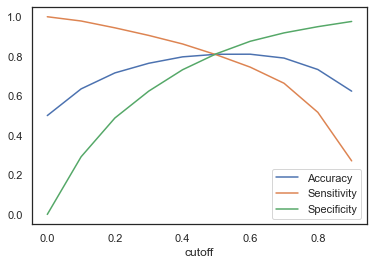

In [180]:
cutoff.plot.line(x = 'cutoff')

In [181]:
p ,r , thresholds = metrics.precision_recall_curve(train_prediction.Churn_Actual,train_prediction.Churn_Prob)

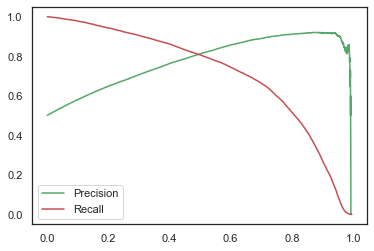

In [182]:
plt.plot(thresholds,p[:-1],'g-')
plt.plot(thresholds,r[:-1],'r-')
plt.legend(labels=['Precision','Recall'])
plt.show()

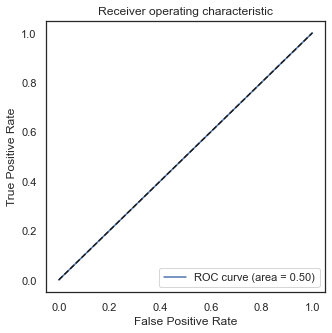

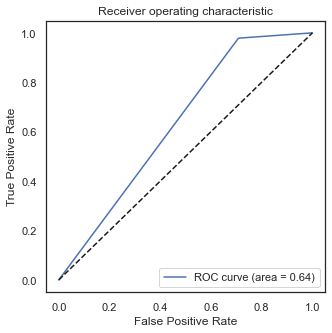

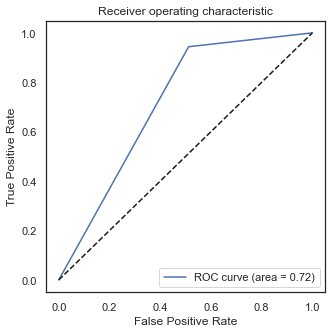

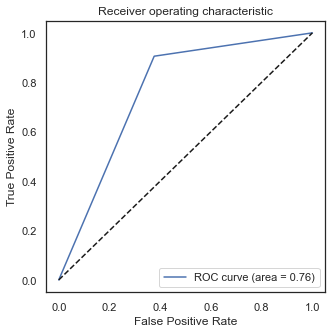

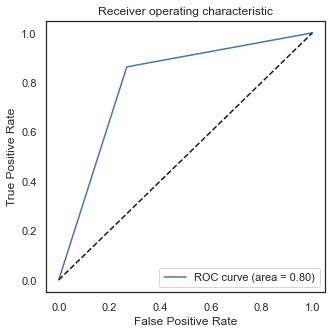

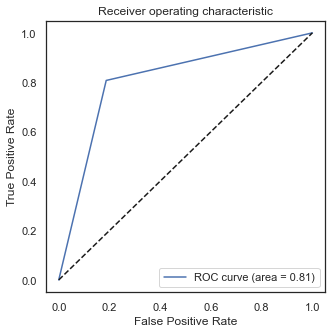

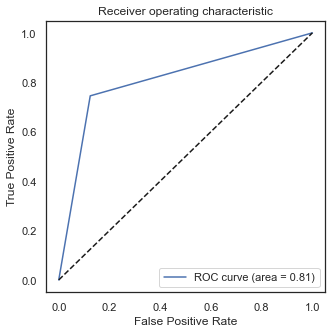

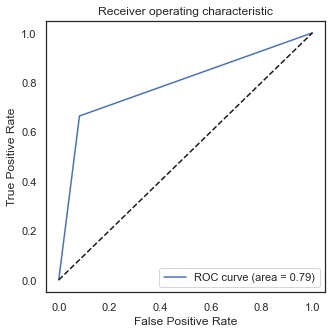

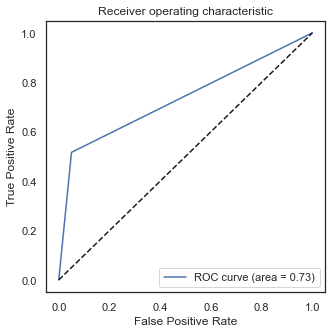

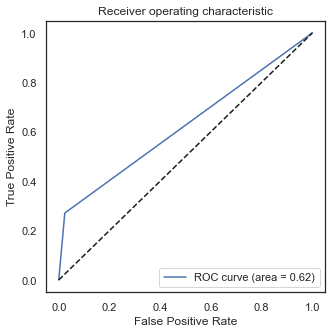

In [183]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0,1], 'k--')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    plt.show()

for x in np.arange(0.0,1,0.1):
    draw_roc(train_prediction.Churn_Actual, train_prediction[x])

### Taking cut-off as 0.5

In [185]:
train_prediction.head()

Churn_Actual  Churn_Prob  0.0  0.1  0.2  0.30000000000000004  0.4  0.5  \
0             0    0.391339    1    1    1                    1    0    0   
1             0    0.153181    1    1    0                    0    0    0   
2             1    0.960048    1    1    1                    1    1    1   
3             0    0.288356    1    1    1                    0    0    0   
4             0    0.041712    1    0    0                    0    0    0   

   0.6000000000000001  0.7000000000000001  0.8  0.9  
0                   0                   0    0    0  
1                   0                   0    0    0  
2                   1                   1    1    1  
3                   0                   0    0    0  
4                   0                   0    0    0

In [208]:
train_prediction['Churn_Prediction'] = train_prediction.Churn_Prob.map(lambda x : 1 if x > 0.5 else 0)

In [209]:
confusion = metrics.confusion_matrix(train_prediction.Churn_Actual,train_prediction.Churn_Prediction)
print(confusion)

[[15244  3509]
 [ 3611 15142]]


In [210]:
metrics.accuracy_score(train_prediction.Churn_Actual, train_prediction.Churn_Prediction)

0.8101637071401909

In [211]:
metrics.precision_score(train_prediction.Churn_Actual, train_prediction.Churn_Prediction)

0.8118599538898719

In [212]:
metrics.recall_score(train_prediction.Churn_Actual, train_prediction.Churn_Prediction)

0.80744414227057

In [213]:
metrics.f1_score(train_prediction.Churn_Actual, train_prediction.Churn_Prediction)

0.8096460271628704

In [192]:
top_var = pd.DataFrame({'Features':X_train[col].columns,'Correlation':stats.params[1:].values})
top_var['sort'] = top_var.Correlation.map(lambda x : np.abs(x))
top_var = top_var.sort_values('sort',ascending=False,ignore_index=True)
top_var.drop('sort',inplace=True,axis=1)

In [193]:
top_var

Features  Correlation
0                 total_rech_amt_8    -1.350842
1                 loc_ic_t2m_mou_8    -0.953563
2   recharge_num_days_before_EOM_8     0.360080
3                   total_ic_mou_6     0.230389
4                              aon    -0.215984
5                 std_og_t2m_mou_7     0.191632
6                      onnet_mou_7     0.191136
7                     offnet_mou_8     0.122978
8   recharge_num_days_before_EOM_7    -0.105851
9                   total_ic_mou_7    -0.095340
10                    loc_og_mou_7    -0.090705

In [ ]:
# logreg.fit(X_train_rfe,y_train)
# y_train_pred = logreg.predict(X_train_rfe)
# y_train_pred

In [194]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scaled.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.190466  0.062568  0.278302    -0.636918    -0.641663    -0.043872   
1 -0.047605  0.882392  1.081963     0.729800     0.455875     1.079004   
2 -0.069127 -0.869195  0.154312    -0.202461    -0.471234     0.228240   
3 -0.585685 -0.485107  0.119062    -0.210027    -0.117978     0.002404   
4  0.061520  0.207292  0.463315    -0.063827     0.458712     0.976233   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  loc_og_t2t_mou_6  \
0      0.001973     -0.290962      0.073900          0.274184   
1     -0.708431     -0.094897      0.321561          2.638136   
2      0.932007      0.081882      0.516882          1.057618   
3     -0.829013     -0.677960     -0.244988          1.043975   
4      2.291113      1.548042      1.799745          1.307609   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0          0.202043          0.812191          1.024219          0.742304   
1          2.154336          2.784029          0.119851          0.917324   
2          0.506011          1.354378          2.466502          1.227539   
3          1.136057          0.974877         -0.361877         -0.037534   
4          2.164609          2.611330          4.163704          2.989612   

   loc_og_t2m_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
0          0.870670      0.742939      0.527084      0.814807   
1          1.165716      1.430057      1.532139      1.936128   
2          1.517291      2.061748      0.980977      1.457634   
3          0.175445      0.396186      0.553544      0.619336   
4          3.010456      3.396874      2.791734      2.937682   

   std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0         -0.872913         -0.836313         -0.300027         -0.767245   
1         -0.460929         -0.741890         -0.619667         -0.769508   
2         -0.872913         -0.836313         -0.619667         -0.852095   
3         -0.872913         -0.836313         -0.619667         -1.012610   
4         -0.872913         -0.836313         -0.619667         -0.268359   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_mou_6  std_og_mou_7  \
0         -0.965436         -0.762203     -1.034391     -1.099641   
1         -0.863223         -0.762203     -0.835545     -1.054141   
2         -0.965436         -0.668804     -1.075104     -0.970044   
3         -0.965436         -0.762203     -1.227550     -1.165756   
4         -0.128997         -0.152464     -0.467083     -0.329356   

   std_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
0     -0.625779       -0.338433       -0.492747        0.140497   
1     -0.788290        0.089275        0.176989        0.795060   
2     -0.787893        0.489391       -0.186695        0.495322   
3     -0.875793       -0.643182       -0.479270       -0.006472   
4     -0.125425        1.532823        1.175698        1.508188   

   loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0          0.756279         -0.151585          0.357773          1.063537   
1          1.637497          1.910506          3.050207          0.171466   
2          3.412458          2.925665          3.489306          1.290165   
3          0.472469          0.920675          1.367907         -0.762972   
4          2.092290          1.325973          1.254839          1.159589   

   loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_mou_6  loc_ic_mou_7  \
0          1.262765          0.885463      0.929965      0.832049   
1          1.359206          1.163338      1.480293      3.032217   
2          1.669707          1.649683      2.279290      2.154475   
3         -0.137211         -0.061508     -0.215494      0.242063   
4          0.849140          0.830729      1.525953      1.085194   

   loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  \
0      0.759740     -0.548490     -1.062549      0.098000        0.644837   
1 

In [195]:
X_test_sm = sm.add_constant(X_test_scaled[col])

In [196]:
y_test_pred = stats.predict(X_test_sm)

In [197]:
test_pred = pd.DataFrame(y_test_pred,columns=['Churn_Prob'])

In [214]:
y_test_prediction = test_pred.Churn_Prob.map(lambda x : 1 if x > 0.5 else 0)

In [215]:
confusion = metrics.confusion_matrix(y_test,y_test_prediction)
print(confusion)

[[6578 1460]
 [ 166  568]]


In [216]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives 
FN = confusion[1,0] # false negatives 

In [218]:
metrics.accuracy_score(y_test,y_test_prediction)

0.8146374829001368

In [222]:
sensitivity = TP/float(TP+FN)
sensitivity

0.773841961852861

In [223]:
specificity = TN/(TN+FP)
specificity

0.8183627768101518

## Trimming Outliers

In [ ]:
# for x in df[num_col].columns:
#     boxs(x)

In [ ]:
# def remove_outliers(df_,outlier_col):
    
#     Q = df_[outlier_col].quantile(0.99)

#     df_ = df_[df_[outlier_col] <= Q]
#     return df_

In [ ]:
# def remove_outliers(x):
#     Q = df[x].quantile(.99)
#     df.drop(df[df[x] > Q].index ,axis=0,inplace=True)

## For EDA

In [ ]:
# for x in df[num_col].columns:
#     print(df[x].value_counts(normalize=True,dropna=False)*100)
#     print('\n')

In [ ]:
# def box(mon6,mon7,mon8,mon9):
#     plt.figure(figsize=(20,10))

#     plt.subplot(2,2,1)
#     plt.title('Box Plot of ' + mon6.name + ' vs ' + 'Churn',fontdict={'size':20,'family': 'serif'})
#     sns.boxplot(x=df['Churn'],y=mon6)
#     sns.despine(offset=10, trim=True)

#     plt.subplot(2,2,2)
#     plt.title('Box Plot of ' + mon7.name + ' vs ' + 'Churn',fontdict={'size':20,'family': 'serif'})
#     sns.boxplot(x=df['Churn'],y=mon6)
#     sns.despine(offset=10, trim=True)

#     plt.subplot(2,2,3)
#     plt.title('Box Plot of ' + mon8.name + ' vs ' + 'Churn',fontdict={'size':20,'family': 'serif'})
#     sns.boxplot(x=df['Churn'],y = mon8)
#     sns.despine(offset=10, trim=True)

#     plt.subplot(2,2,4)
#     plt.title('Box Plot of ' + mon9.name + ' vs ' + 'Churn',fontdict={'size':20,'family': 'serif'})
#     sns.boxplot(x=df['Churn'],y= mon9)
#     sns.despine(offset=10, trim=True)
#     plt.tight_layout()
#     plt.show()

In [ ]:
# def box(y):
#     plt.figure(figsize=(14,5))
#     plt.title('Box Plot of ' + y.name + ' vs ' + 'Churn',fontdict={'size':20,'family': 'serif'})
#     sns.boxplot(x=df['Churn'],y=y)
#     sns.despine(offset=10, trim=True)

# Miscellaneous

In [ ]:
# df[cat_col] = df[cat_col].apply(lambda x : pd.to_datetime(x,format="%m/%d/%Y"))

In [ ]:
# def ismissing():
#     for i in range(6,10):
#         print(i)
#         count2 = 'count_rech_2g_{}'.format(str(i))
#         count3 = 'count_rech_3g_{}'.format(str(i))
#         date = 'date_of_last_rech_data_{}'.format(str(i))
#         avg = 'av_rech_amt_data_{}'.format(str(i))
#         total = 'total_rech_data_{}'.format(str(i))
        
#         print(df[count2].isnull().sum())
#         print(df[count3].isnull().sum())
#         print(df[date].isnull().sum())
#         print(df[avg].isnull().sum())
#         print(df[total].isnull().sum())